<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso. 

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. 

Para ganar, el jugador debe sacar el mismo número en ambos dados. 

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). 

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana. 

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [ ]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randint()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [ ]:
print(random.randint(1, 6))

2


In [ ]:
# Creando funcion de lanzamiento de dados
def roll_dice():
    a=random.randint(1, 6)
    b=random.randint(1, 6)
    same_num=False
    if a==b:
      same_num= True
    return same_num

In [ ]:
roll_dice()

False

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener. 

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**. 

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar. 

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [ ]:
# Entradas
# buscamosprobabilidad de ganar (ganancias por juego divididas por el número total de tiradas) 
#y el saldo final para cada simulación (o juego).

num_simulations = 10000 #Valor dado # conteo de simulación de Monte Carlo
max_num_rolls = 1000 #<COMPLETA>
bet = 1 #<COMPLETA>
# Seguimiento
win_probability = []#<COMPLETA>
end_balance = [] #<COMPLETA>

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

(0.0, 1000.0)

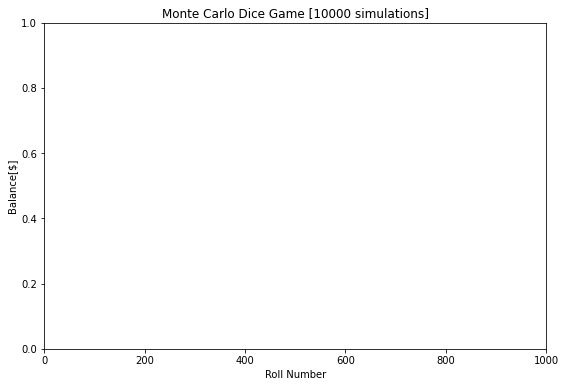

In [ ]:
# Creando figura para los ejemplos de simulacion

fig=plt.figure(figsize=(9,6))  
plt.xlabel("Roll Number")
plt.ylabel("Balance[$]")
plt.title("Monte Carlo Dice Game [10000 simulations]")
plt.xlim([0, 1000])


En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas). 

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos. 

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

In [ ]:
num_simulations = 10000 #Valor dado # conteo de simulación de Monte Carlo
max_num_rolls = 1000 #<COMPLETA>
bet = 1 #<COMPLETA>
# Seguimiento
win_probability = []#<COMPLETA>
end_balance = [] #<COMPLETA>

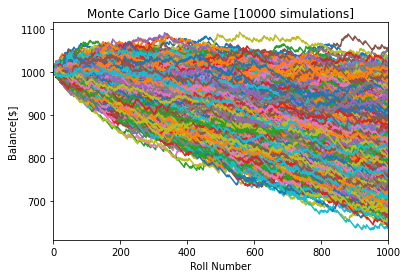

In [ ]:
# For para ejecutar todas las simulaciones deseadas
for i in range(num_simulations):
    balance = 1000 #<COMPLETA>
    num_rolls = [0] #<COMPLETA>
    num_wins = 0 #<COMPLETA>
    end_balance = []

    while num_rolls[-1] < max_num_rolls:
        #<COMPLETA>   lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado  
        b = roll_dice()

        if b==True:#Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo  y agregamos una ganancia al conteo de ganancias
          balance += 4*bet
          num_wins +=bet
          
        else: # Si los dados son diferentes, restamos la apuesta de la lista de saldo
          balance -= 1        
        
        num_rolls.append(num_rolls[-1] + 1)# Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls
        end_balance.append(balance) #<COMPLETA>

    #print(end_balance)
    win_probability.append(num_wins/max_num_rolls) #<COMPLETA>
    plt.plot(end_balance)
    plt.xlabel("Roll Number")
    plt.ylabel("Balance[$]")
    plt.title("Monte Carlo Dice Game [10000 simulations]")
    plt.xlim([0, 1000])
    


In [ ]:
# Probabilidad promedio de victoria y saldo final
#print(win_probability)
overall_win_probability = sum(win_probability)/ len(win_probability) #<COMPLETA>
overall_end_balance = sum(end_balance)/ len(end_balance) #<COMPLETA>
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

Promedio de victorias despues de 10000 simulaciones: 0.16658359999999908
Saldo promedio despues de 10000 simulaciones: $919.615


## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los 
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria? 

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos. 

In [ ]:
num_simulations = [200, 2000, 20000] #Valor dado # conteo de simulación de Monte Carlo
max_num_rolls = [ 10, 100, 1000, 10000] #<COMPLETA>
bet = 3 #<COMPLETA>
# Seguimiento
win_probability = []#<COMPLETA>


In [ ]:
## en grabacion esta en el min 1:05:00 (clase del 25-feb)

def sim(n,m):
  for i in range(num_simulations[n]):
    balance = 800 #<COMPLETA>
    num_rolls = [0] #<COMPLETA>
    num_wins = 0 #<COMPLETA>
    end_balance = []

    while num_rolls[-1] < max_num_rolls[m]:
        #<COMPLETA>   lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado  
        b = roll_dice()

        if b==True:#Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo  y agregamos una ganancia al conteo de ganancias
          balance += 6*bet
          num_wins +=1
          
        else: # Si los dados son diferentes, restamos la apuesta de la lista de saldo
          balance -= bet        
        
        num_rolls.append(num_rolls[-1] + 1)# Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls
        end_balance.append(balance) #<COMPLETA>

    #print(end_balance)
    win_probability.append(num_wins/num_rolls[-1]) #<COMPLETA>
    plt.plot(end_balance)
    plt.xlabel("Roll Number")
    plt.ylabel("Balance[$]")
    plt.title("Monte Carlo Dice Game [" + str(num_simulations[n])+" simulations]")

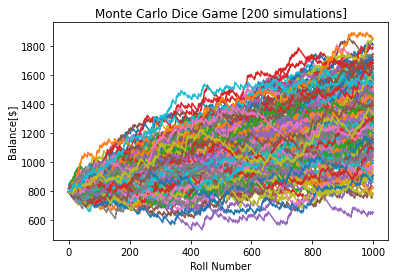

In [ ]:
sim(0,2)

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [ ]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [ ]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [ ]:
# Usamos requests para obtener los datos de la URL dada
page = requests.get(url)
page

<Response [200]>

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraemos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [ ]:
# Transformamos todo el codigo HTML usando beautiful soup
soup = BeautifulSoup(page.text, 'html.parser')

# Titulo de la pagina transformada
soup.title

<title>Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com</title>

In [ ]:
main_box = soup.find_all("div", {"class":"_13oc-S"})
#soup
len(main_box)

24

In [ ]:
box=main_box[0]
box


<div class="_13oc-S"><div data-id="COMGHYYKESUN5ZKQ" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-victus-intel-core-i5-11th-gen-16-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-16-d0311tx-gaming-laptop/p/itm22c164f45d999?pid=COMGHYYKESUN5ZKQ&amp;lid=LSTCOMGHYYKESUN5ZKQNTQDKG&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_e5shCq7JClroE8Rw5SS1ZCVu7k%2FfMoNm7kcupdQfrqRIv%2FooTcGk49ezT%2BgOTGtOVWqwQTijCqeUWUawETN5xw%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=3toyin5d2o0000001677945384304&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Victus Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ..." class="_396cs4" loading="eager" src="https://rukmin

In [ ]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [ ]:
print(title,price,rating)

HP Victus Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ... 65,990 4.4


In [ ]:
data_list=[]
for box in main_box:
    temp_dict={}
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()
        temp_dict['title'] = box.find('div', {'class':'_4rR01T'}).text.strip()
        temp_dict['price'] = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()   
    data_list.append(temp_dict)

In [ ]:
data_list
#len(data_list)

[{'rating': '4.4',
  'title': 'HP Victus Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ...',
  'price': '65,990'},
 {'rating': 'unknown'},
 {'rating': '4.4',
  'title': 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
  'price': '49,990'},
 {'rating': '4.2',
  'title': 'Infinix INBook Y1 Plus Intel Core i3 10th Gen - (8 GB/256 GB SSD/Windows 11 Home) XL28 Thin and Light ...',
  'price': '29,990'},
 {'rating': '4.2',
  'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
  'price': '35,490'},
 {'rating': '4.6',
  'title': 'MSI Katana GF66 Core i5 12th Gen - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce RTX ...',
  'price': '69,990'},
 {'rating': '4.1',
  'title': 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...',
  'price': '21,990'},
 {'rating': '

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [ ]:

#<COMPLETA>

'''df = pd.DataFrame(columns=["rating", "title", "price"])

for i in range(len(data_list)):
  df.loc[i] = data_list[i] # Append the row to the dataframe using the loc method
df
'''
df = pd.DataFrame(data_list)
df
df.to_csv('aver.csv', index=False)

### Paso 5: Un poco de EDA y visualización de este archivo

In [ ]:

#<COMPLETA>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  24 non-null     object
 1   title   22 non-null     object
 2   price   22 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [ ]:
laptop_df = df.copy() # | Crea una copia auxiliar llamada laptop_df

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [ ]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

<ipython-input-62-0651590cc0ae>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str


,rating,price,model,spec
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,(16 GB/512 GB SSD/Windows 11 Home/4 GB Graphi...
1,unknown,NaN,NaN,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
3,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,(8 GB/256 GB SSD/Windows 11 Home) XL28 Thin a...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 14s - dy250...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [ ]:
#<COMPLETA>
laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('(', 1).str
del laptop_df['spec']
laptop_df.head()

<ipython-input-63-4474625c77f5>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('(', 1).str


,rating,price,model,RAM,HDD
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,,16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics...
1,unknown,NaN,NaN,NaN,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,,8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/...
3,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,,8 GB/256 GB SSD/Windows 11 Home) XL28 Thin and...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,,8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507T...


In [ ]:
laptop_df['RAM'], laptop_df['Hard disk'] = laptop_df['HDD'].str.split('/', 1).str
del laptop_df['HDD']
laptop_df.head()

<ipython-input-64-2c4d842419e0>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['Hard disk'] = laptop_df['HDD'].str.split('/', 1).str


,rating,price,model,RAM,Hard disk
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
1,unknown,NaN,NaN,NaN,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
3,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,8 GB,256 GB SSD/Windows 11 Home) XL28 Thin and Ligh...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 14s - dy2507TU Thi...


Continuemos hasta conseguir lo siguiente...

In [ ]:
laptop_df['Storage'], laptop_df['OS'] = laptop_df['Hard disk'].str.split('/', 1).str
del laptop_df['Hard disk']
laptop_df.head()

<ipython-input-65-56c4c8f5a9e8>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Storage'], laptop_df['OS'] = laptop_df['Hard disk'].str.split('/', 1).str


,rating,price,model,RAM,Storage,OS
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
1,unknown,NaN,NaN,NaN,NaN,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
3,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,8 GB,256 GB SSD,Windows 11 Home) XL28 Thin and Light ...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home) 14s - dy2507TU Thin and Light...


In [ ]:
laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str
del laptop_df['OS']
laptop_df.head()


<ipython-input-66-cd7066190ae3>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str


,rating,price,model,RAM,Storage,System,Other_Info
0,4.4,"65,990",HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
1,unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,8 GB,256 GB SSD,Windows 11 Home,XL28 Thin and Light ...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
laptop_df.isnull()

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,True
1,False,True,True,True,True,True,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False
7,False,True,True,True,True,True,True
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
laptop_df.isnull().sum()

rating        0
price         2
model         2
RAM           2
Storage       2
System        2
Other_Info    8
dtype: int64

In [ ]:
laptop_df['model'].nunique()

22

In [ ]:
laptop_df['model'].value_counts()

HP Victus Intel Core i5 11th Gen                    1
ASUS TUF Gaming F15 Core i5 10th Gen                1
DELL Core i5 12th Gen                               1
HP Ryzen 5 Hexa Core 5500U                          1
Lenovo Athlon Dual Core                             1
HP 15s Core i3 11th Gen                             1
HP 15s Intel Core i3 11th Gen                       1
DELL Vostro Core i3 11th Gen                        1
MSI Katana GF66 Core i7 11th Gen                    1
Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7    1
Lenovo V15 G2 Core i3 11th Gen                      1
HP Pavilion Intel Core i5 12th Gen                  1
HP 15s Intel Core i3 12th Gen                       1
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core AMD R5    1
RedmiBook Pro Core i5 11th Gen                      1
APPLE 2020 Macbook Air M1                           1
ASUS VivoBook 15 (2022) Core i3 10th Gen            1
ASUS VivoBook 14 (2021) Celeron Dual Core           1
MSI Katana GF66 Core i5 12th

In [ ]:
laptop_df.describe()

,rating,price,model,RAM,Storage,System,Other_Info
count,24,22,22,22,22,22,16
unique,10,19,22,3,3,9,16
top,4.4,"56,990",HP Victus Intel Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,XL28 Thin and Light ...
freq,5,2,1,15,13,11,1


In [ ]:
laptop_df.dtypes

rating        object
price         object
model         object
RAM           object
Storage       object
System        object
Other_Info    object
dtype: object

Modifiquemos la columna de precio y rating para que sean de tipo numerico

In [ ]:
laptop_df['price'] = laptop_df['price'].replace(np.nan, 0)
laptop_df['price']= laptop_df['price'].str.replace(',', '')
laptop_df['price']=pd.to_numeric(laptop_df['price'])
laptop_df.dtypes
#laptop_df['price']

rating         object
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

In [ ]:
#laptop_df['rating']

In [ ]:
laptop_df['rating'] = laptop_df['rating'].replace('unknown', '0')
laptop_df['rating']=pd.to_numeric(laptop_df['rating'])
laptop_df.dtypes

rating        float64
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

In [ ]:
laptop_df.describe()

,rating,price
count,24.000000,22.000000
mean,3.916667,49538.863636
std,1.221071,18842.867501
min,0.000000,18990.000000
25%,4.100000,35859.000000
50%,4.250000,46990.000000
75%,4.400000,63740.000000
max,4.700000,86990.000000


In [ ]:
laptop_df.dtypes

rating        float64
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista.

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
laptop_df.isna().sum()

rating        0
price         2
model         2
RAM           2
Storage       2
System        2
Other_Info    8
dtype: int64

In [ ]:
# return a new dataframe by dropping a row
# 'b' & 'c' from dataframe
update_df = laptop_df.drop([1, 7])


In [ ]:
update_df 

,rating,price,model,RAM,Storage,System,Other_Info
0,4.4,65990.0,HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
2,4.4,49990.0,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.2,29990.0,Infinix INBook Y1 Plus Intel Core i3 10th Gen,8 GB,256 GB SSD,Windows 11 Home,XL28 Thin and Light ...
4,4.2,35490.0,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
5,4.6,69990.0,MSI Katana GF66 Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce R...,NaN
6,4.1,21990.0,ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home,X415MA-BV011W Thin and L...
8,4.3,32990.0,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
9,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
10,4.1,36966.0,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop
11,4.4,54729.0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core AMD R5,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphic...,NaN


In [ ]:
update_df[(update_df['rating']<=4)]

,rating,price,model,RAM,Storage,System,Other_Info
17,4.0,37990.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
19,4.0,39890.0,HP 15s Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,15S-FQ2670TU Laptop
20,3.9,18990.0,Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop


In [ ]:
#<COMPLETA> Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $
update_df[(update_df['rating']>=3.5) & (update_df['price']>=30000) & (update_df['price']<=40000)]

,rating,price,model,RAM,Storage,System,Other_Info
4,4.2,35490.0,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
8,4.3,32990.0,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
10,4.1,36966.0,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop
14,4.4,35490.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,V15 ITL G2 Laptop
17,4.0,37990.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
19,4.0,39890.0,HP 15s Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,15S-FQ2670TU Laptop


---------

### Visualización de los datos

In [ ]:
#<COMPLETA>
import seaborn as sns

Realizaremos una gráfica de barras de precio vs rating

<AxesSubplot:title={'center':'Price vs rating'}, xlabel='price', ylabel='rating'>

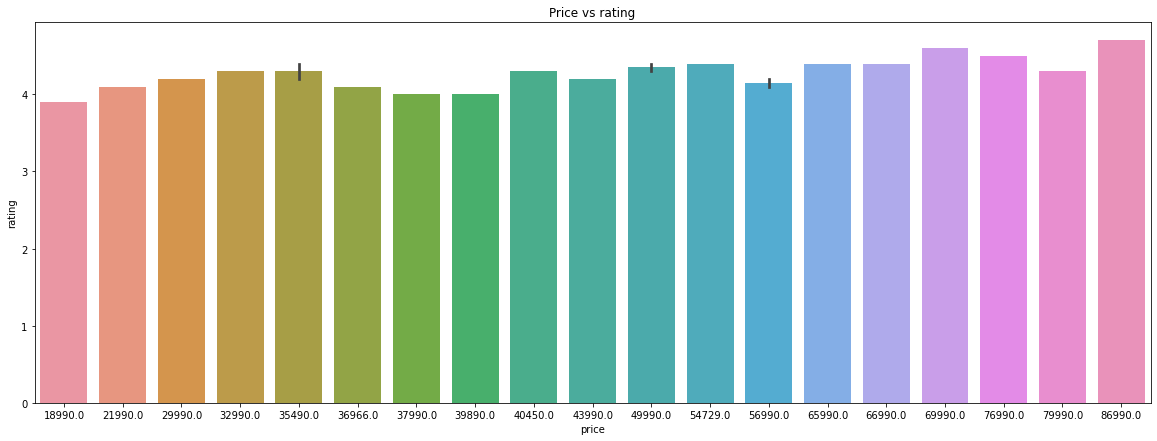

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Price vs rating')
sns.barplot(x="price", y="rating", data=update_df)

<AxesSubplot:title={'center':'Rating vs price'}, xlabel='rating', ylabel='price'>

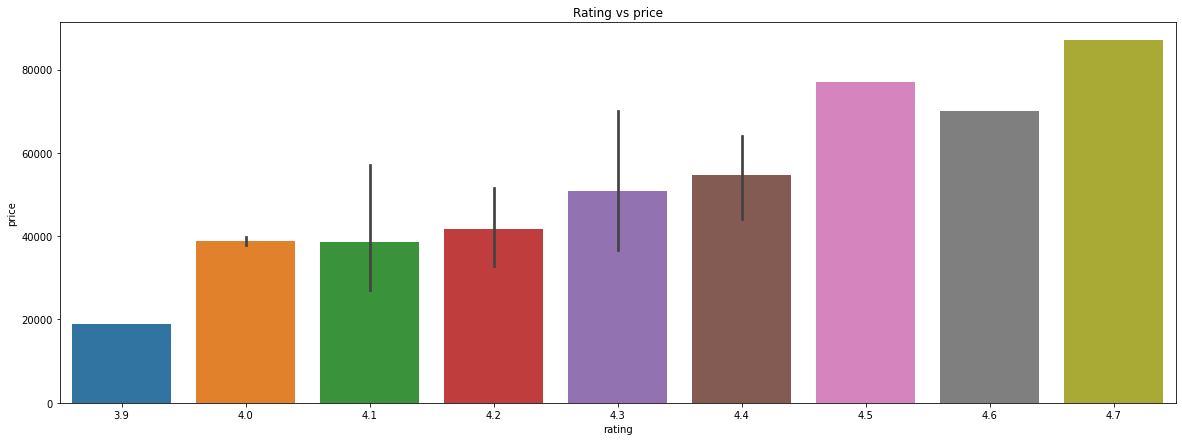

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Rating vs price')
sns.barplot(x="rating", y="price", data=update_df)

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

<AxesSubplot:xlabel='price'>

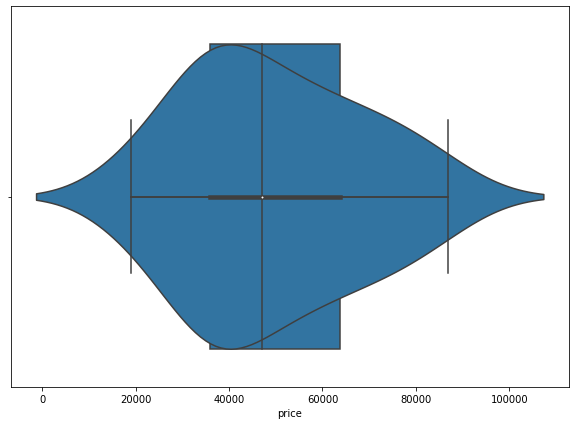

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = update_df['price'])
sns.violinplot(x=update_df['price'])


## ¿Les ha salido algún discordante visual a ustedes?

In [ ]:
#No, en este caso no tenemos outlayes o valores discordantes
update_df.describe()

,rating,price
count,22.000000,22.000000
mean,4.272727,49538.863636
std,0.198042,18842.867501
min,3.900000,18990.000000
25%,4.125000,35859.000000
50%,4.300000,46990.000000
75%,4.400000,63740.000000
max,4.700000,86990.000000


### ¿Para ustedes, cuáles fueron las computadoras más caras?

In [ ]:
#La laptop de precio mayor es:
update_df[(update_df['price']>=update_df['price'].max())]

,rating,price,model,RAM,Storage,System,Other_Info
9,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A


In [ ]:
update_df.sort_values(['rating', 'price'], ascending=False)


,rating,price,model,RAM,Storage,System,Other_Info
9,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
5,4.6,69990.0,MSI Katana GF66 Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce R...,NaN
15,4.5,76990.0,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphic...,NaN
13,4.4,66990.0,HP Pavilion Intel Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home,14-dv2014TU Thin and Light Lap...
0,4.4,65990.0,HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
11,4.4,54729.0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core AMD R5,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphic...,NaN
2,4.4,49990.0,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
14,4.4,35490.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,V15 ITL G2 Laptop
16,4.3,79990.0,MSI Katana GF66 Core i7 11th Gen,16 GB,512 GB SSD,Windows 10 Home/6 GB Graphics/NVIDIA GeForce R...,NaN
21,4.3,49990.0,HP Ryzen 5 Hexa Core 5500U,16 GB,512 GB SSD,Windows 11 Home,15s- eq2182AU Thin and Light Laptop


In [ ]:
update_df.groupby("rating")["price"].max()

rating
3.9    18990.0
4.0    39890.0
4.1    56990.0
4.2    56990.0
4.3    79990.0
4.4    66990.0
4.5    76990.0
4.6    69990.0
4.7    86990.0
Name: price, dtype: float64

Tras una breve inspección de los datos, concluimos que la laptop en el indice 16 es la mas cara, considerando la relación rating-precio.

In [ ]:
update_df.loc[16]


rating                                                      4.3
price                                                   79990.0
model                         MSI Katana GF66 Core i7 11th Gen 
RAM                                                       16 GB
Storage                                              512 GB SSD
System        Windows 10 Home/6 GB Graphics/NVIDIA GeForce R...
Other_Info                                                  NaN
Name: 16, dtype: object